In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas
import descartes
import geoplot

In [2]:
def add_continent(n):
    res = ""
    for c in world_df.iterrows():
        if c[1]['name'] in n or n == "Worldwide":
            res += c[1]['continent']
        
    return res

def read_shapefile(sf):
    #fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]#fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]#converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)#assigning the coordinates
    df = df.assign(coords=shps)
    return df

In [3]:
def plot_shape(id, s=None):
    plt.figure()
    #plotting the graphical axes where map ploting will be done
    ax = plt.axes()
    ax.set_aspect('equal')#storing the id number to be worked upon
    shape_ex = sf.shape(id)#NP.ZERO initializes an array of rows and column with 0 in place of each elements 
    #an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    x_lon = np.zeros((len(shape_ex.points),1))#an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points))[:2000]:
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]#plotting using the derived coordinated stored in array created by numpy
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)# use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [4]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords()[:-10]:
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1

In [5]:
def fillCountryCount(n):
    ret = 0
    for index, row in price_df[price_df['filename'] == DATE].iterrows():
        if n in row.ship_from :
            ret += int(row['count'])
    return ret

def fillContinentCount(n):
    ret = 0
    for index, row in price_df[price_df['filename'] == DATE].iterrows():
        if n in row.ship_from :
            ret += int(row['count'])
    return ret

In [6]:
def toUSD(pb):
    return prices[prices['date'] == pb]['price']

In [7]:
price_df = pd.read_csv('../saved_gen_df/prices_and_stuff.csv')
price_df = price_df.drop(columns=['mean', 'std', 'min', '25%', '75%'])

In [8]:
price_df

,filename,ship_from,count,50%,max
0,2014-06-09,Argentina,18.0,0.000000,0.000000
1,2014-06-09,Australia,592.0,0.000000,0.000000
2,2014-06-09,Austria,11.0,0.000000,0.000000
3,2014-06-09,Belgium,66.0,0.000000,0.000000
4,2014-06-09,Brazil,2.0,0.000000,0.000000
...,...,...,...,...,...
14514,2015-07-12,bluerave,137.0,0.003000,0.150000
14515,2015-07-12,United Kingdom,4.0,0.249186,0.614932
14516,2015-07-12,United States of America,2.0,0.282305,0.282305
14517,2015-07-12,world,1.0,0.090443,0.090443


In [9]:
world = geopandas.read_file(
    geoplot.datasets.get_path('world')
)
sf = shp.Reader('../data/ne_50m_admin_0_countries.shp')
world_df = read_shapefile(sf)

In [19]:
world_df = world_df[['NAME', 'CONTINENT']]
world_df.rename(columns={'NAME':'name'}, inplace=True)
world_df = pd.merge(world, world_df, how='inner')

In [20]:
world_df['count'] = 0
world_df['continent_count'] = 0

In [28]:
DATE = "2015-07-12"
world_df['count'] = world_df['name'].apply(fillCountryCount)
world_df['continent_count'] = world_df['CONTINENT'].apply(fillContinentCount)

In [22]:
world_df.to_csv("../saved_gen_df/listing_count_"+DATE+"_map_df.csv")

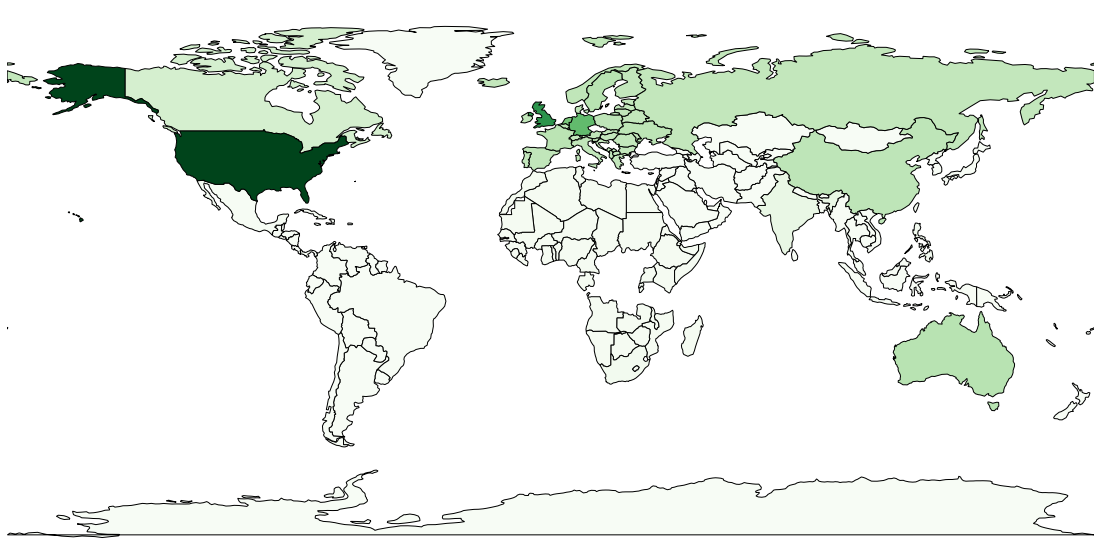

In [29]:
geoplot.choropleth(
    world_df, hue=world_df['count']+world_df['continent_count'],
    cmap='Greens', figsize=(20, 10)
)

In [30]:
DATE = "2014-06-09"
world_df['count'] = world_df['name'].apply(fillCountryCount)
world_df['continent_count'] = world_df['CONTINENT'].apply(fillContinentCount)

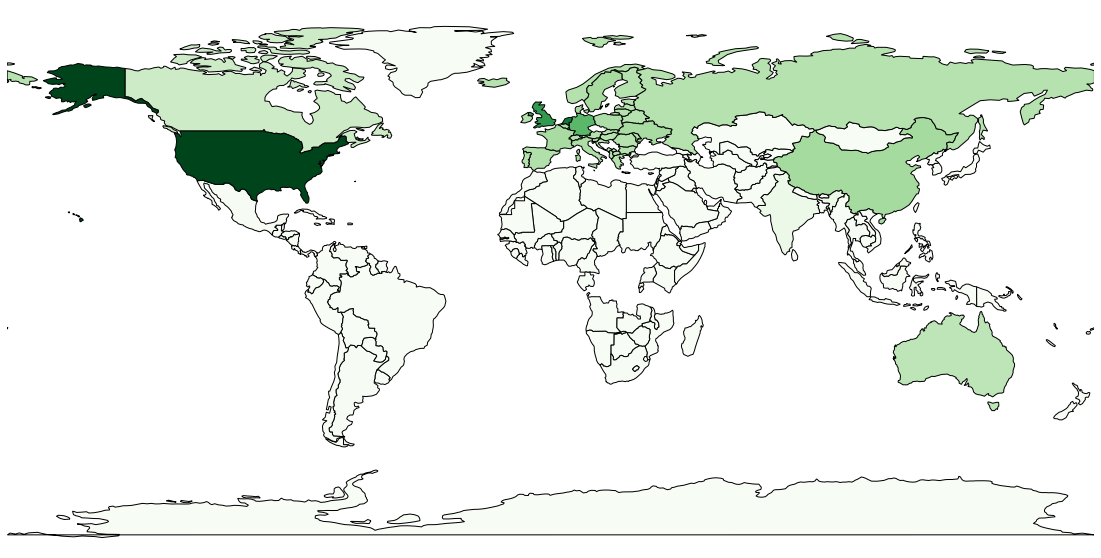

In [31]:
geoplot.choropleth(
    world_df, hue=world_df['count']+world_df['continent_count'],
    cmap='Greens', figsize=(20, 10)
)